In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data
pub_df = pd.read_csv('../data/Surnames_pubs_data.csv')
faculty_df = pd.read_csv('../data/Surnames_faculty_data.csv')

In [3]:
# take a look at df
pub_df.head()

,Unnamed: 0,title,jcode,vol,no,pages,author1,author2,author3,author4,author5,keyauthor1,keyauthor2,keyauthor3,keyauthor4,keyauthor5,authors
0,1,A Market Test for Discrimination in the Englis...,2,108,3,15,Stefan Szymanski,NaN,NaN,NaN,NaN,OtherAuthor,NaN,NaN,NaN,NaN,1
1,2,A Model of Bimetallism,2,108,6,26,Francois R. Velde,Warren E. Weber,NaN,NaN,NaN,OtherAuthor,OtherAuthor,NaN,NaN,NaN,2
2,3,A Ricardian Model with a Continuum of Goods un...,2,108,6,29,Kiminori Matsuyama,NaN,NaN,NaN,NaN,Matsuyama,NaN,NaN,NaN,NaN,1
3,4,A Theory of Conservatism,2,109,3,21,Hao Li,NaN,NaN,NaN,NaN,OtherAuthor,NaN,NaN,NaN,NaN,1
4,5,Adverse Specialization,2,109,4,37,Glenn MacDonald,Leslie M. Marx,NaN,NaN,NaN,OtherAuthor,OtherAuthor,NaN,NaN,NaN,2


In [4]:
# take a look at other df
faculty_df.head()

,Unnamed: 0,lname,fname,key,rank,status,tenure,emeritus,year,nationality,...,psych,esfellow,indian,otherasian,jewish,indian2,otherasian2,jewish2,nobel,clark
0,1,ABDULKADIROGLU,ATILA,ABDULKADIROGLU,12.0,Assistant,0.0,0.0,2000.0,Turkey,...,0,NaN,0,0,0,1,0,0,0.0,0.0
1,2,ABOWD,JOHN,ABOWD,18.0,Full,1.0,0.0,1977.0,USA,...,0,NaN,0,0,0,0,0,0,0.0,0.0
2,3,ADAMS,WILLIAM JAMES,ADAMS14,14.0,Full,1.0,0.0,1973.0,NaN,...,0,NaN,0,0,0,0,0,0,0.0,0.0
3,4,AGUIRREGABIRIA,VICTOR,AGUIRREGABIRIA,21.0,Assistant,0.0,0.0,1995.0,Spain,...,0,NaN,0,0,0,0,0,0,0.0,0.0
4,5,ALESSANDRIA,GEORGE,ALESSANDRIA,32.0,Assistant,0.0,0.0,2000.0,USA,...,0,NaN,0,0,0,0,0,1,0.0,0.0


In [5]:
# column names
faculty_df.columns

Index(['Unnamed: 0', 'lname', 'fname', 'key', 'rank', 'status', 'tenure',
       'emeritus', 'year', 'nationality', 'university', 'psych', 'esfellow',
       'indian', 'otherasian', 'jewish', 'indian2', 'otherasian2', 'jewish2',
       'nobel', 'clark'],
      dtype='object')

In [6]:
# check for null columns
faculty_df.isnull().sum()

Unnamed: 0        0
lname             0
fname             0
key            1746
rank              1
status           62
tenure           64
emeritus         40
year           1168
nationality    2268
university        0
psych             0
esfellow       2779
indian            0
otherasian        0
jewish            0
indian2           0
otherasian2       0
jewish2           0
nobel          1747
clark          1747
dtype: int64

In [7]:
econ_faculty = faculty_df[faculty_df['psych'] == 0]

econ_faculty.isnull().sum()

Unnamed: 0        0
lname             0
fname             0
key               0
rank              0
status            0
tenure            2
emeritus          0
year            271
nationality     521
university        0
psych             0
esfellow       1032
indian            0
otherasian        0
jewish            0
indian2           0
otherasian2       0
jewish2           0
nobel             0
clark             0
dtype: int64

In [8]:
# fill missing values with 0
faculty_df['nobel'] = faculty_df['nobel'].fillna(0)
faculty_df['clark'] = faculty_df['clark'].fillna(0)

In [9]:
# define a letter dict 
letter_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,
               'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
               'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15,
               'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20,
               'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25,
               'Z': 26}

In [10]:
def first_letter(lname):
    '''
    Function to extract the first letter of somebody's
    last name
    
    Input: lname - person's last name
    
    Output: first letter of the last name
    '''
    
    first_letter = lname[0]
    
    return first_letter

In [11]:
def letter_to_number(first_letter, letter_dict):
    '''
    Converts the first letter of somebody's last name
    to its corresponding number in the alphabet
    
    Inputs: first_letter - first letter of the last name
            letter_dict - dictionary mapping letters to their numbers
            
    Outputs: the number corresponding to the first letter of a name
    '''
    
    return letter_dict[first_letter]

In [12]:
def clark_or_nobel(cols):
    '''
    Function determining whether or not somebody won a Nobel Prize
    or a Clark Medal
    
    Inputs: cols - two columns, the first being Nobel Prize winning year
                   and the second being Clark Award winning year
                   
    Outputs: whether or not somebody has won either award
    '''
    
    nobel = cols[0]
    clark = cols[1]

    if nobel or clark:
        return 1
    return 0

In [13]:
def binarize_letter(letter_as_number):
    
    if letter_as_number <= 13:
        return 0
    return 1

<AxesSubplot:xlabel='letter_as_number', ylabel='avg_authorship'>

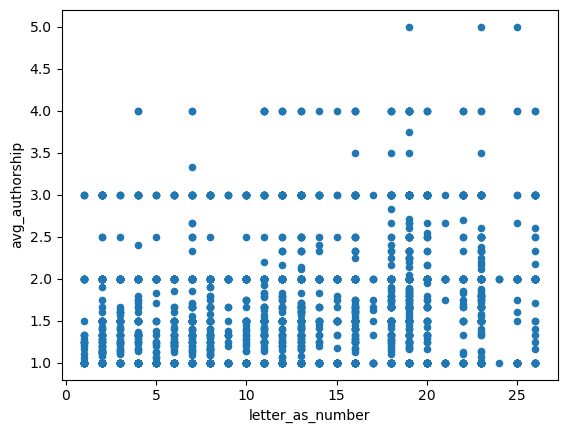

In [31]:
# Calculate average authorship position
# use pub dataset to get authors and their positions
author_ranks = pd.melt(pub_df, id_vars=['title'], value_vars = ['author1', 'author2', 'author3', 'author4', 'author5'], var_name = 'author_rank')
author_ranks = author_ranks.dropna()
author_ranks['author_rank'] = author_ranks['author_rank'].replace({'author1':1,'author2':2,'author3':3,'author4':4,'author5':5})

avg_ranks = author_ranks.groupby('value')['author_rank'].mean().reset_index()
avg_ranks['first_letter_fname'] = avg_ranks['value'].str[0]
avg_ranks['lname'] = avg_ranks['value'].str.split().str[-1].str.upper()
avg_ranks['first_letter'] = avg_ranks['lname'].str[0]
avg_ranks = avg_ranks.rename(columns={'value': 'full_name', "author_rank": "avg_authorship"})

avg_ranks['letter_as_number'] = avg_ranks['first_letter'].apply(letter_to_number, args = (letter_dict,))

avg_ranks.plot(kind = 'scatter', x = 'letter_as_number', y = 'avg_authorship')


In [32]:
#Calculate number of publications
n_pubs = author_ranks.groupby('value').size().reset_index(name = "n_pubs")
n_pubs = n_pubs.rename(columns={'value': 'full_name'})

avg_ranks = pd.merge(n_pubs,avg_ranks, on="full_name")

avg_ranks

,full_name,n_pubs,avg_authorship,first_letter_fname,lname,first_letter,letter_as_number
0,A. Andrew John,1,1.000000,A,JOHN,J,10
1,A. Araujo,2,1.000000,A,ARAUJO,A,1
2,A. B. Atkinson,2,1.000000,A,ATKINSON,A,1
3,A. Bhargava,1,1.000000,A,BHARGAVA,B,2
4,A. C. Cameron,1,1.000000,A,CAMERON,C,3
...,...,...,...,...,...,...,...
5002,Zvi Griliches,7,1.857143,Z,GRILICHES,G,7
5003,Zvi Hercowitz,4,1.500000,Z,HERCOWITZ,H,8
5004,Zvi Safra,5,1.800000,Z,SAFRA,S,19
5005,Zvika Neeman,2,1.000000,Z,NEEMAN,N,14


In [17]:
# apply functions to df
faculty_df['first_letter'] = faculty_df['lname'].apply(first_letter)
faculty_df['first_letter_fname'] = faculty_df['fname'].str[0]
faculty_df['letter_as_number'] = faculty_df['first_letter'].apply(letter_to_number, args=(letter_dict,))
faculty_df['nobel_or_clark'] = faculty_df[['nobel', 'clark']].apply(clark_or_nobel, axis=1)
faculty_df['letter_binarized'] = faculty_df['letter_as_number'].apply(binarize_letter)
faculty_df = faculty_df.merge(avg_ranks[['first_letter_fname','lname','avg_authorship']], on=['first_letter_fname','lname'], how = 'left')

faculty_df

,Unnamed: 0,lname,fname,key,rank,status,tenure,emeritus,year,nationality,...,otherasian2,jewish2,nobel,clark,first_letter,first_letter_fname,letter_as_number,nobel_or_clark,letter_binarized,avg_authorship
0,1,ABDULKADIROGLU,ATILA,ABDULKADIROGLU,12.0,Assistant,0.0,0.0,2000.0,Turkey,...,0,0,0.0,0.0,A,A,1,0,0,NaN
1,2,ABOWD,JOHN,ABOWD,18.0,Full,1.0,0.0,1977.0,USA,...,0,0,0.0,0.0,A,J,1,0,0,1.0
2,2,ABOWD,JOHN,ABOWD,18.0,Full,1.0,0.0,1977.0,USA,...,0,0,0.0,0.0,A,J,1,0,0,1.0
3,3,ADAMS,WILLIAM JAMES,ADAMS14,14.0,Full,1.0,0.0,1973.0,NaN,...,0,0,0.0,0.0,A,W,1,0,0,NaN
4,4,AGUIRREGABIRIA,VICTOR,AGUIRREGABIRIA,21.0,Assistant,0.0,0.0,1995.0,Spain,...,0,0,0.0,0.0,A,V,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,3050,ZINBARG,RICHARD,NaN,24.0,Associate,1.0,0.0,NaN,NaN,...,0,0,0.0,0.0,Z,R,26,0,1,NaN
3318,3051,ZOELLNER,LORI,NaN,12.0,Assistant,0.0,0.0,1997.0,NaN,...,0,1,0.0,0.0,Z,L,26,0,1,NaN
3319,3052,ZUCKER,ROBERT,NaN,1.0,Full,1.0,0.0,NaN,NaN,...,0,0,0.0,0.0,Z,R,26,0,1,NaN
3320,3053,ZUCKER,IRVING,NaN,9.0,Full,1.0,0.0,1964.0,NaN,...,0,0,0.0,0.0,Z,I,26,0,1,NaN


In [18]:
def plot_distributions(df, col_to_examine, ranking_cap, letter_dict, psych=0):
    '''
    Plots the cumulative distributions of a given column
    
    Inputs: df - the dataframe with faculty
            col_to_examine - the desired column to examine
            ranking_cap - what ranked school to cap the data at
            letter_dict - the dictionary mapping letters to numbers
            psych - binary for psych department, default to 0 signifies econ
            
    Outputs: No outputs, but shows a plot with the given cumulative distribution
    '''
    
    sample_df = df[(df['rank'] <= ranking_cap) & (df['psych'] == psych)]
    plt.figure(figsize=(8, 8))
    plt.hist(sample_df[sample_df[col_to_examine] == 1]['letter_as_number'], histtype='step', bins=26, \
             cumulative=True, density=True, label='{} Distribution'.format(col_to_examine))
    plt.hist(sample_df[sample_df[col_to_examine] == 0]['letter_as_number'], histtype='step', bins=26, \
             cumulative=True, density=True, label='No {} Distribution'.format(col_to_examine))    
    
    plt.legend(loc=2, fontsize=16)
    plt.title('Name and {} Distribution for Top {} Universities'.format(col_to_examine, ranking_cap), fontsize=20)
    plt.xlabel('First Letter of Last Name', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    plt.xticks([x for x in letter_dict.values()], [x for x in letter_dict.keys()], fontsize=15)
    plt.yticks(fontsize=15)

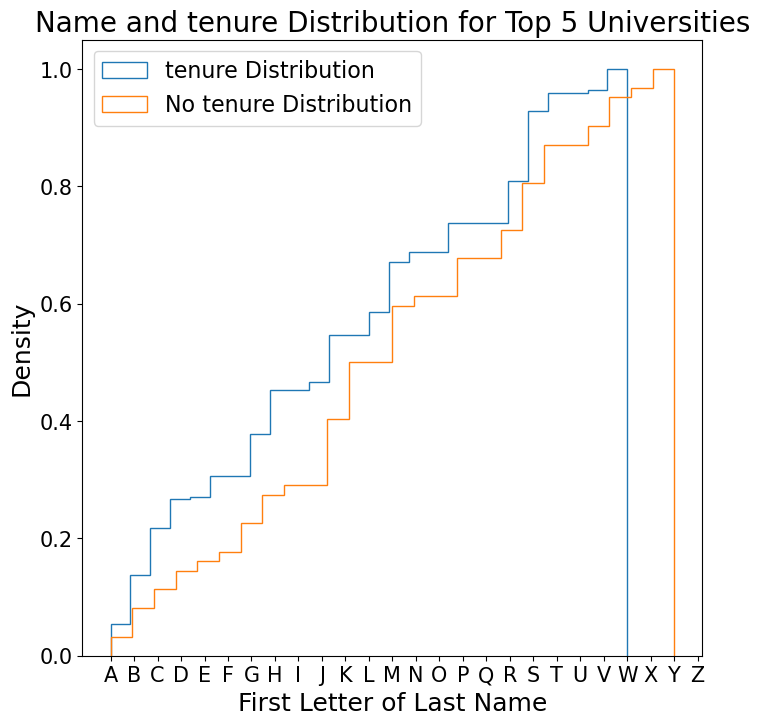

In [19]:
plot_distributions(faculty_df, 'tenure', 5, letter_dict)

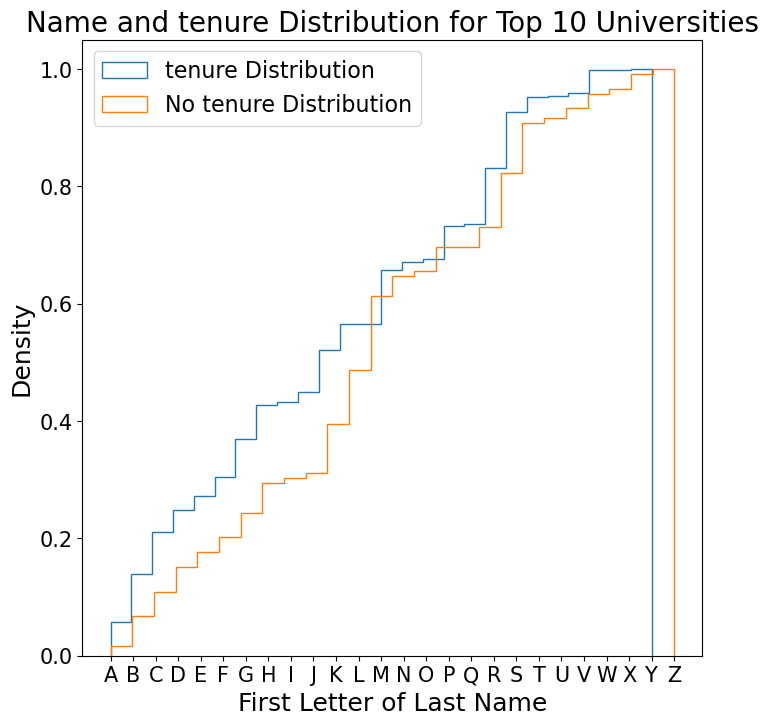

In [20]:
plot_distributions(faculty_df, 'tenure', 10, letter_dict)

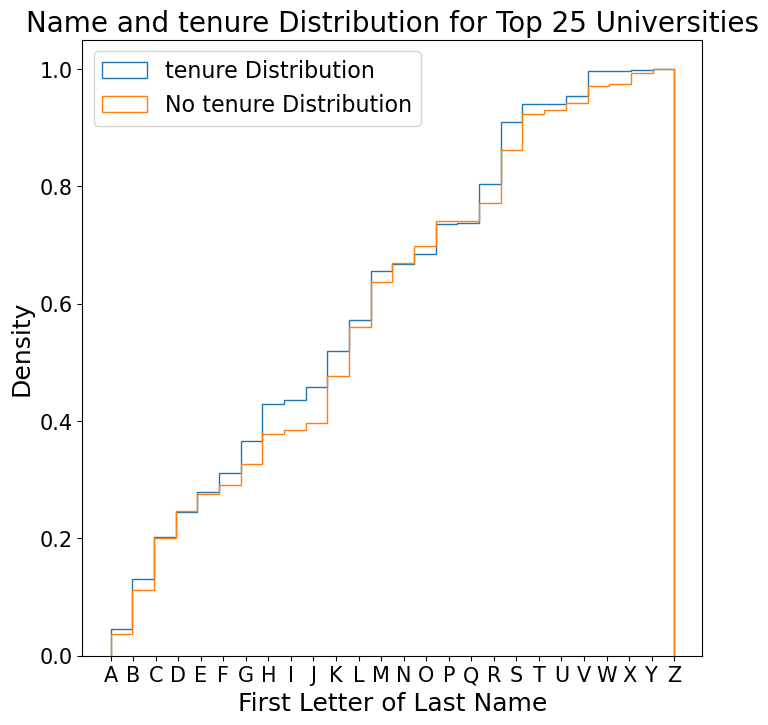

In [21]:
plot_distributions(faculty_df, 'tenure', 25, letter_dict)

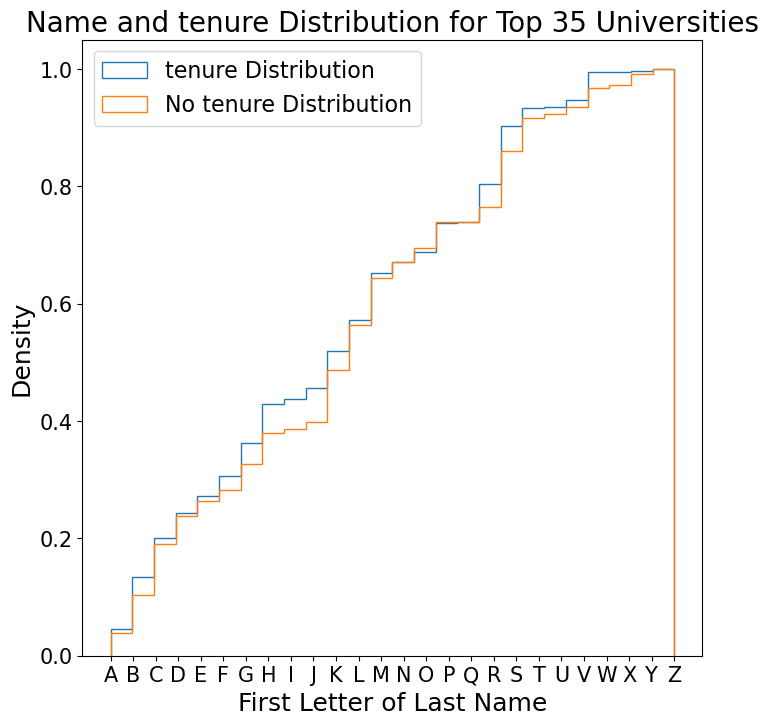

In [22]:
plot_distributions(faculty_df, 'tenure', 35, letter_dict)

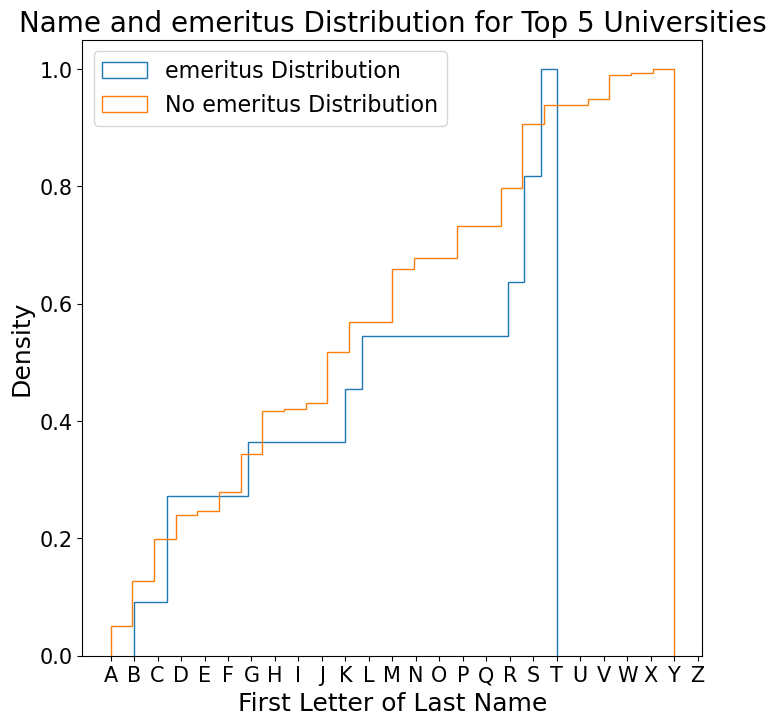

In [23]:
plot_distributions(faculty_df, 'emeritus', 5, letter_dict)

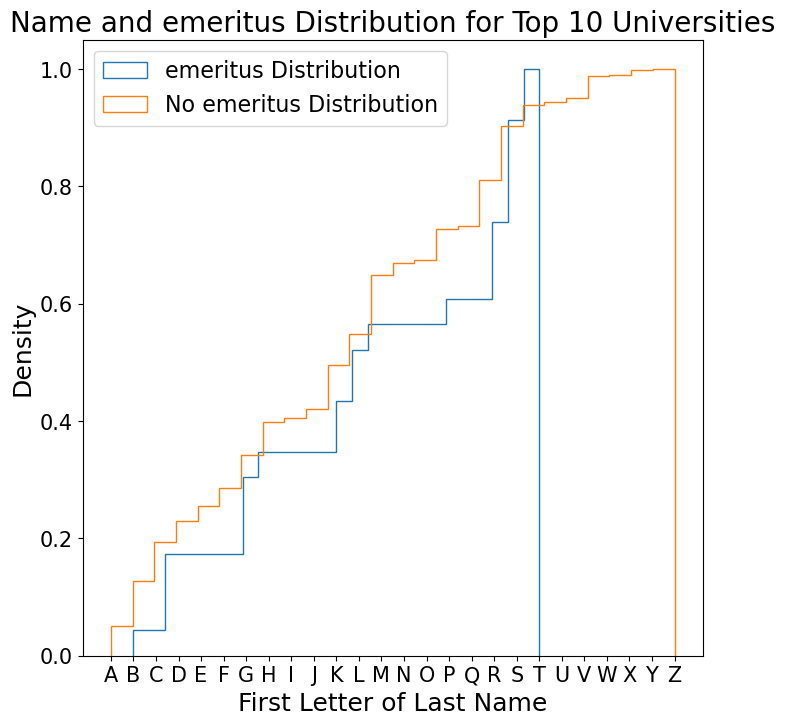

In [24]:
plot_distributions(faculty_df, 'emeritus', 10, letter_dict)

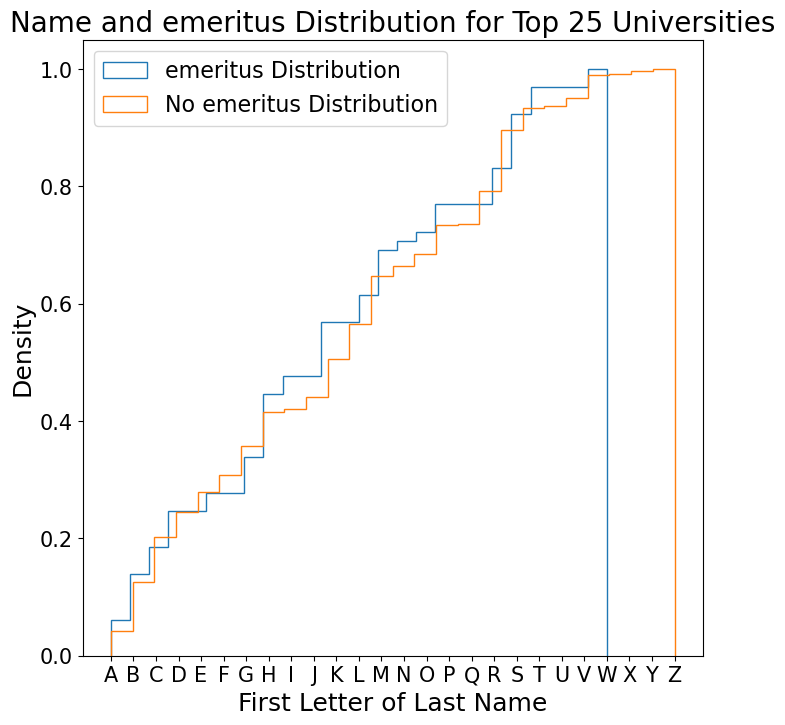

In [25]:
plot_distributions(faculty_df, 'emeritus', 25, letter_dict)

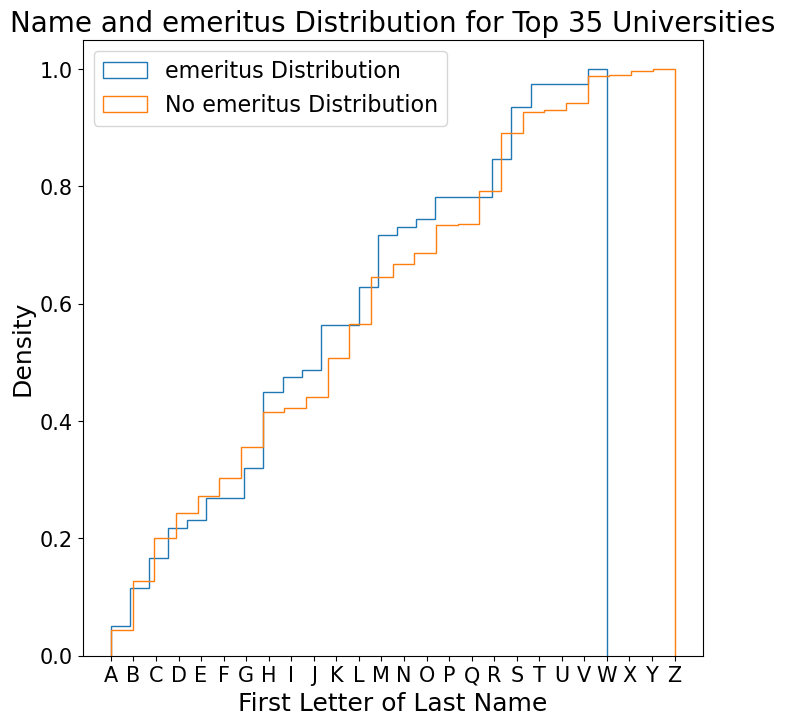

In [26]:
plot_distributions(faculty_df, 'emeritus', 35, letter_dict)

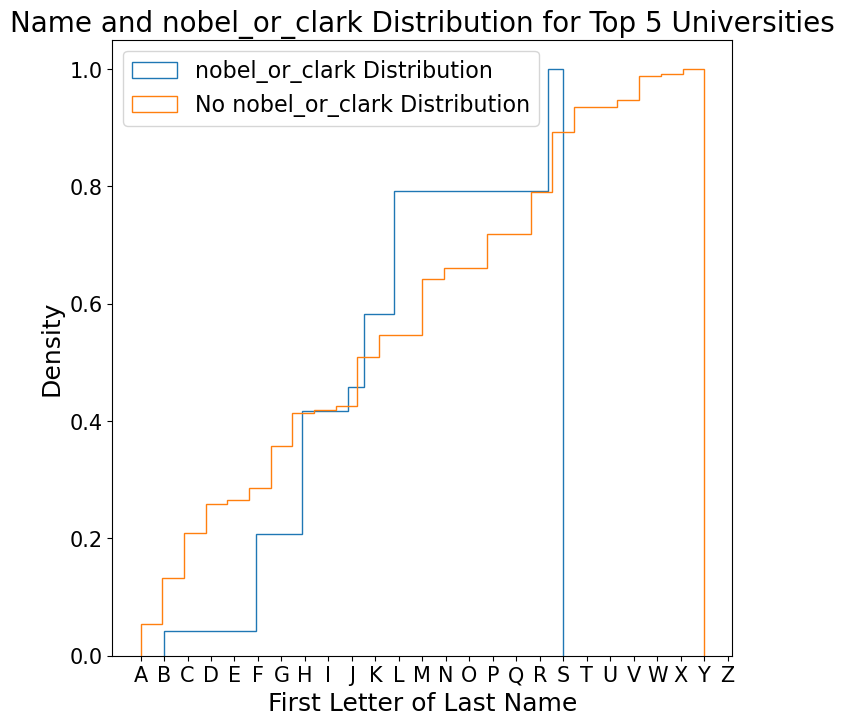

In [27]:
plot_distributions(faculty_df, 'nobel_or_clark', 5, letter_dict)

In [28]:
import statsmodels.formula.api as smf

In [29]:
mod = smf.logit('tenure ~ letter_as_number + indian + otherasian + jewish + rank', \
                data=faculty_df[(faculty_df['psych'] == 0) & (faculty_df['rank'] <= 5)]).fit()

print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.497488
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 tenure   No. Observations:                  287
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                 0.04666
Time:                        12:17:10   Log-Likelihood:                -142.78
converged:                       True   LL-Null:                       -149.77
Covariance Type:            nonrobust   LLR p-value:                   0.01577
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8411      0.428      4.298      0.000       1.001       2.681
letter_as_n

In [30]:
#avg_authorship is still missing for ~2000 profs
mod = smf.logit('tenure ~ letter_as_number + indian + otherasian + jewish + rank + avg_authorship', \
                data=faculty_df[(faculty_df['psych'] == 0) & (faculty_df['rank'] <= 5)]).fit()

print(mod.summary())

         Current function value: 0.329736
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 tenure   No. Observations:                  225
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                 0.05474
Time:                        12:17:16   Log-Likelihood:                -74.191
converged:                      False   LL-Null:                       -78.487
Covariance Type:            nonrobust   LLR p-value:                    0.1978
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.4298      0.877      2.770      0.006       0.710       4.149
letter_as_number    -0.0136      0.036     -0.3

c:\Users\Owner\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
mod = smf.logit('tenure ~ letter_as_number + indian + otherasian + jewish + rank', \
                data=faculty_df[(faculty_df['psych'] == 0) & (faculty_df['rank'] <= 35)]).fit()

print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.502275
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 tenure   No. Observations:                 1532
Model:                          Logit   Df Residuals:                     1526
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                 0.04669
Time:                        12:17:16   Log-Likelihood:                -769.49
converged:                       True   LL-Null:                       -807.17
Covariance Type:            nonrobust   LLR p-value:                 7.773e-15
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2638      0.162      7.806      0.000       0.946       1.581
letter_as_n